# Week 8 Homework

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import xarray as xr
import cartopy.crs as ccrs

In [8]:
## load Atlanta temperature data
# load excel data as pandas dataframe
df=pd.read_excel("https://o2.eas.gatech.edu/data/ATL_MonMeanTemp_1879_2020.xls",skiprows=1)
data=df.to_numpy()
TMP_ATL_July=data[:,7] # select July temperature
# unit conversion deg F ->deg C
TMP_ATL_July_degC=(TMP_ATL_July-32)*(5/9)
year=df.Year.to_numpy()
# TMP_ATL_July_degC

In [7]:
# load nc data
ds=xr.open_dataset('./air.mon.mean.nc')
# extract surface air temperature data for 1948 to 2020
TMP_NCEP=ds.air.sel(time=slice("1948-01-01","2020-12-01"))

In [13]:
# Atlanta lat lon
# 33.7490° N, 84.3880° W
# note that the longitude range in NCEP data is 0 - 360 deg
# select data for the grid cell Atlanta located
TMP_ATL_NCEP=TMP_NCEP.sel(lat=33.7490,lon=360-84.3880,method="nearest")
# select data for July
mon=7
TMP_ATL_NCEP_July=TMP_ATL_NCEP.sel(time=TMP_ATL_NCEP['time.month']==mon)
year_NCEP=TMP_ATL_NCEP_July['time.year']
year_NCEP

<xarray.DataArray 'year' (time: 73)>
array([1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020])
Coordinates:
    lat      float32 32.5
    lon      float32 275.0
  * time     (time) datetime64[ns] 1948-07-01 1949-07-01 ... 2020-07-01

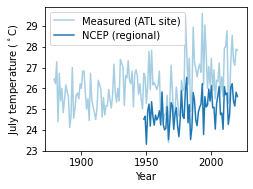

In [14]:
# make a figure that fits into a single column
fig=plt.figure(figsize=(3.5, 2.5)) # define figure size, unit: inches
ax=fig.add_axes([0.1, 0.15, 0.8, 0.8])
cmap=plt.get_cmap('Paired')
plt.plot(year,TMP_ATL_July_degC,label='Measured (ATL site)',color=cmap(0)) 
plt.plot(year_NCEP,TMP_ATL_NCEP_July,label='NCEP (regional)',color=cmap(1))
plt.xlabel('Year')
plt.ylabel('July temperature ($^\circ$C)')
# add figure legend
plt.legend()

# save figure as .PDF and .PNG
# put save commands before plt.show()
fn='Fig_ATL_July_temp'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight")
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight")
plt.show()

In [15]:
# extract surface air temperature data for 1948 to 2020
TMP_NCEP1=ds.air.sel(time=slice("1950-01-01","1960-12-31"))
TMP_NCEP2=ds.air.sel(time=slice("2010-01-01","2020-12-31"))

# Select JULY data for every year and average
TMP_NCEP_JUL1=TMP_NCEP1.sel(time=TMP_NCEP1['time.month']==7).mean(dim='time')
TMP_NCEP_JUL2=TMP_NCEP2.sel(time=TMP_NCEP2['time.month']==7).mean(dim='time')

diff_TMP_NCEP_JUL=TMP_NCEP_JUL2-TMP_NCEP_JUL1

# X=np.append(TMP_NCEP_mean.lon.values,360)
# Y=np.append(TMP_NCEP_mean.lat.values,-90)
X=ds.lon.values
Y=ds.lat.values

# grid boundaries
Xb=np.arange(-2.5/2, 360,2.5)
Yb=np.arange(90-2.5/2, -90,-2.5)
Yb=np.append(90,Yb)
Yb=np.append(Yb,-90)

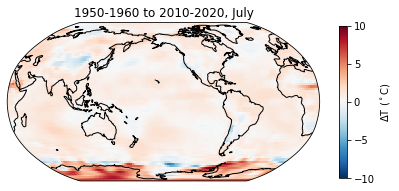

In [19]:
Z=diff_TMP_NCEP_JUL
# Robinson projections
fig=plt.figure(figsize=(7, 4))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=-150))
ax.coastlines()
cf=ax.pcolormesh(Xb,Yb,Z, transform=ccrs.PlateCarree(),vmin=-10,vmax=10,cmap='RdBu_r',rasterized=True,shading='flat')
plt.colorbar(cf, ax=ax,shrink=0.7, label='$\Delta$T ($^\circ$C)')

ax.set_title('1950-1960 to 2010-2020, July')

fn='Fig_Delta_T_July_RobinsonProj'
plt.savefig('./fig/'+fn+'.pdf',bbox_inches="tight",dpi=300)
plt.savefig('./fig/'+fn+'.png',bbox_inches="tight",dpi=300)
plt.show()